In [1]:
%matplotlib inline

In [2]:
import pandas
import pandas as pd
import numpy
import re

In [3]:
from scipy.stats import ttest_ind
from nltk.corpus import stopwords
from collections import defaultdict

In [4]:
import gensim 
import spacy

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.externals import joblib

C:\Anaconda\data\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
from matplotlib import pyplot


In [8]:
dset = pandas.read_csv('FakeReviewDatsets.csv')

In [9]:
stop = set(stopwords.words('english'))

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
dset.head(3).append(dset.tail(3))

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [12]:
dset.pivot_table(
    columns=['deceptive','polarity'],
    index = ['hotel'],
    aggfunc = len)

source                                 text           \
deceptive        deceptive          truthful          deceptive            
polarity          negative positive negative positive  negative positive   
hotel                                                                      
affinia                 20       20       20       20        20       20   
allegro                 20       20       20       20        20       20   
amalfi                  20       20       20       20        20       20   
ambassador              20       20       20       20        20       20   
conrad                  20       20       20       20        20       20   
fairmont                20       20       20       20        20       20   
hardrock                20       20       20       20        20       20   
hilton                  20       20       20       20        20       20   
homewood                20       20       20       20        20       20   
hyatt                   20       20       20       20        20       20   
intercontinental        20       20       20       20        20       20   
james                   20       20       20       20        20       20   
knickerbocker           20       20       20       20        20       20   
monaco                  20       20       20       20        20       20   
omni                    20       20       20       20        20       20   
palmer                  20       20       20       20        20       20   
sheraton                20       20       20       20        20       20   
sofitel                 20       20       20       20        20       20   
swissotel               20       20       20       20        20       20   
talbott                 20       20       20       20        20       20   

                                    
deceptive        truthful           
polarity         negative positive  
hotel                               
affinia                20       20  
allegro                20       20  
amalfi                 20       20  
ambassador             20       20  
conrad                 20       20  
fairmont               20       20  
hardrock               20       20  
hilton                 20       20  
homewood               20       20  
hyatt                  20       20  
intercontinental       20       20  
james                  20       20  
knickerbocker          20       20  
monaco                 20       20  
omni                   20       20  
palmer                 20       20  
sheraton               20       20  
sofitel                20       20  
swissotel              20       20  
talbott                20       20

In [13]:
def mean_len(group, mean = True):
    if mean == True:
        return numpy.mean(group.text.str.len())
    else:
        return group.text.str.len()

In [14]:
a = dset.groupby(
    ['deceptive']).apply(
    mean_len, mean = True)

In [15]:
b = dset.groupby(
    ['polarity']).apply(
    mean_len, mean = True)

In [16]:
c = dset.groupby(
    ['deceptive','polarity']).apply(
    mean_len, mean = True)

In [17]:
d = dset.groupby(
    ['hotel','polarity']).apply(
    mean_len, mean = True)

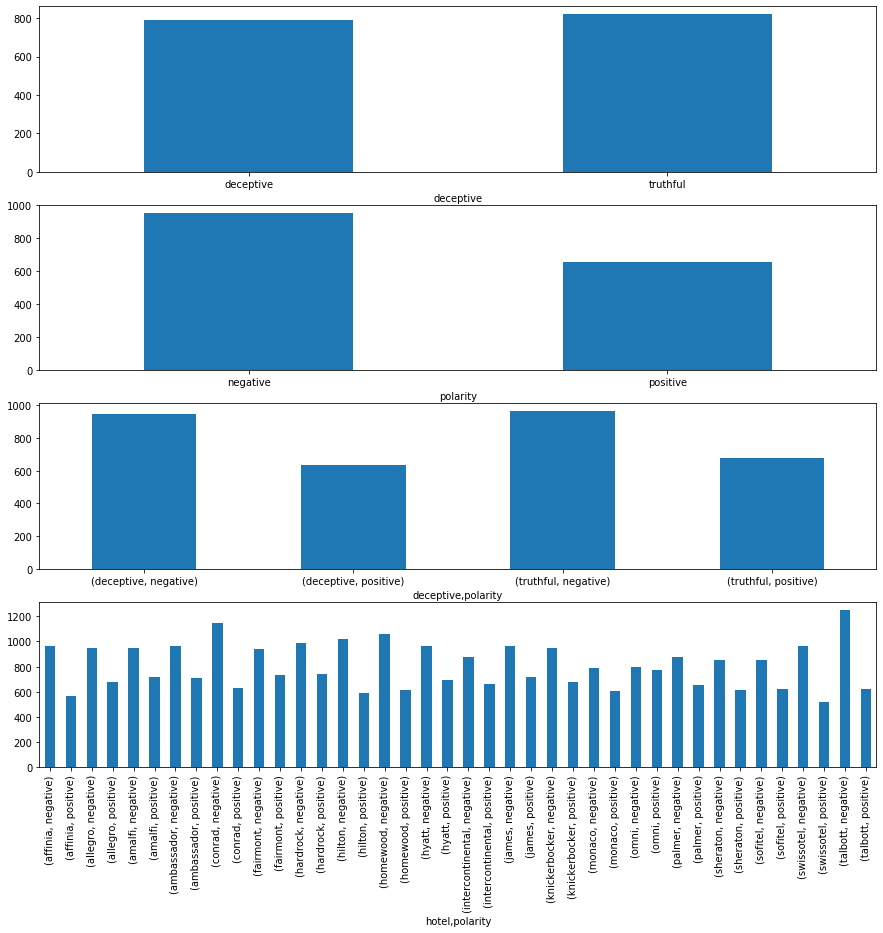

In [18]:
fig, ax =pyplot.subplots(4,1,figsize=(15,14))

a.plot('bar',ax = ax[0], rot = 0 )

b.plot('bar',ax = ax[1], rot = 0 )

c.plot('bar',ax = ax[2], rot = 0)

d.plot('bar',ax = ax[3])

In [19]:
pandas.set_option('display.float_format', lambda x: '%.f' % x)

In [20]:
test_a = ttest_ind(
    dset[dset.polarity == 'positive'].text.str.len(),
    dset[dset.polarity == 'negative'].text.str.len())

In [21]:
test_b = ttest_ind(
    dset[dset.source == 'TripAdvisor'].text.str.len(),
    dset[dset.source != 'TripAdvisor'].text.str.len())

In [22]:
test_c = ttest_ind(
    dset[dset.deceptive == 'deceptive'].text.str.len(),
    dset[dset.deceptive == 'truthful'].text.str.len())

In [23]:
print('Positive vs Negative: Statisitcally Significant'), 
print(test_a)

Positive vs Negative: Statisitcally Significant
Ttest_indResult(statistic=-13.507204854821099, pvalue=1.8968798894685588e-39)


In [24]:
print('TripAdvisor vs Non TripAdvisor:  Statisitcally Significant'), 
print(test_b)

TripAdvisor vs Non TripAdvisor:  Statisitcally Significant
Ttest_indResult(statistic=-6.439962628933531, pvalue=1.5767614748756925e-10)


In [25]:
print('Deceptive vs Truthfull: Not Statistically Significant'), 
print(test_c)

Deceptive vs Truthfull: Not Statistically Significant
Ttest_indResult(statistic=-1.2520931090803307, pvalue=0.21071916472895064)


In [26]:
data_nlp = dset.copy()
import spacy
nlp = spacy.load("en_core_web_sm")

In [27]:
parsed = nlp.pipe(iter(data_nlp['text']), batch_size=1, n_threads=4)

In [28]:
tokens, lemma, parts, stopword = [], [], [], []

In [29]:
for parsed_doc in parsed:
    tokens.append([n.text for n in parsed_doc])
    lemma.append([n.lemma_ for n in parsed_doc])
    parts.append([n.pos_ for n in parsed_doc])
    stopword.append([n.is_stop for n in parsed_doc])

In [30]:
data_nlp['tokens'] = tokens     
data_nlp['tokens_stopwords'] = data_nlp['tokens'].apply(lambda x: [item for item in x if item not in stop])
data_nlp['lemma'] = lemma
data_nlp['pos'] = parts
data_nlp['stopword'] = stopword

In [31]:
data_nlp.head(2).append(data_nlp.tail(2))

,deceptive,hotel,polarity,source,text,tokens,tokens_stopwords,lemma,pos,stopword
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[We, stayed, for, a, one, night, getaway, with...","[We, stayed, one, night, getaway, family, thur...","[-PRON-, stay, for, a, one, night, getaway, wi...","[PRON, VERB, ADP, DET, NUM, NOUN, NOUN, ADP, N...","[True, False, True, True, True, False, False, ..."
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[Triple, A, rate, with, upgrade, to, view, roo...","[Triple, A, rate, upgrade, view, room, less, $...","[triple, a, rate, with, upgrade, to, view, roo...","[ADJ, DET, NOUN, ADP, NOUN, PART, VERB, NOUN, ...","[False, True, False, True, False, True, False,..."
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[The, Palmer, House, Hilton, ,, while, it, loo...","[The, Palmer, House, Hilton, ,, looks, good, p...","[the, Palmer, House, Hilton, ,, while, -PRON-,...","[DET, PROPN, PROPN, PROPN, PUNCT, SCONJ, PRON,...","[True, False, False, False, False, True, True,..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama...","[As, a, former, Chicagoan, ,, I, 'm, appalled,...","[As, former, Chicagoan, ,, I, 'm, appalled, Am...","[as, a, former, Chicagoan, ,, -PRON-, be, appa...","[SCONJ, DET, ADJ, PROPN, PUNCT, PRON, AUX, VER...","[True, True, True, False, False, True, True, F..."


In [32]:
pron_ct = []
noun_ct = []
punct_ct = []
verb_ct = []

In [33]:
for row in data_nlp.pos:
    pron_ct.append(sum([i == 'PRON'  for i in row]))
    noun_ct.append(sum([i == 'NOUN'  for i in row]))
    punct_ct.append(sum([i == 'PUNCT'  for i in row]))
    verb_ct.append(sum([i == 'VERB'  for i in row]))

In [34]:
stop_row = []
for row in data_nlp.stopword:
    stop_row.append(sum(row))

In [35]:
data_nlp['pron_ct'] = pron_ct
data_nlp['noun_ct'] = noun_ct
data_nlp['punct_ct'] = punct_ct
data_nlp['verb_ct'] = verb_ct
data_nlp['stoprow'] = stop_row

In [36]:
data_nlp.head(2).append(data_nlp.tail(2))

,deceptive,hotel,polarity,source,text,tokens,tokens_stopwords,lemma,pos,stopword,pron_ct,noun_ct,punct_ct,verb_ct,stoprow
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[We, stayed, for, a, one, night, getaway, with...","[We, stayed, one, night, getaway, family, thur...","[-PRON-, stay, for, a, one, night, getaway, wi...","[PRON, VERB, ADP, DET, NUM, NOUN, NOUN, ADP, N...","[True, False, True, True, True, False, False, ...",6,30,12,5,58
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[Triple, A, rate, with, upgrade, to, view, roo...","[Triple, A, rate, upgrade, view, room, less, $...","[triple, a, rate, with, upgrade, to, view, roo...","[ADJ, DET, NOUN, ADP, NOUN, PART, VERB, NOUN, ...","[False, True, False, True, False, True, False,...",0,13,9,3,16
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[The, Palmer, House, Hilton, ,, while, it, loo...","[The, Palmer, House, Hilton, ,, looks, good, p...","[the, Palmer, House, Hilton, ,, while, -PRON-,...","[DET, PROPN, PROPN, PROPN, PUNCT, SCONJ, PRON,...","[True, False, False, False, False, True, True,...",12,14,13,14,55
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama...","[As, a, former, Chicagoan, ,, I, 'm, appalled,...","[As, former, Chicagoan, ,, I, 'm, appalled, Am...","[as, a, former, Chicagoan, ,, -PRON-, be, appa...","[SCONJ, DET, ADJ, PROPN, PUNCT, PRON, AUX, VER...","[True, True, True, False, False, True, True, F...",28,39,29,38,166


In [37]:
def build_model(train_data, topic_n):
    frequency = defaultdict(int)
    for text in train_data:
        for token in text:
            frequency[token] += 1
    word_freq_1plus = [[x for x in words if frequency[x] > 1] for words in train_data]
    dictionary = gensim.corpora.Dictionary(word_freq_1plus)
    corpus = [dictionary.doc2bow(text) for text in train_data]
    tfidf = gensim.models.TfidfModel(corpus) 
    corp_tf = tfidf[corpus] 
    topic_n = topic_n
    lsi = gensim.models.LsiModel(corp_tf, id2word=dictionary, num_topics = topic_n)
    corp_topics = lsi[corp_tf] 
    return corp_topics, dictionary, tfidf, lsi 

In [38]:
train_data = data_nlp.tokens_stopwords

In [39]:
built = build_model(
    train_data = train_data,
    topic_n = 300)

In [40]:
data_nlp_decomposed = pandas.DataFrame([dict(row) for row in built[0]])
topic_only = data_nlp_decomposed
topic_only

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0,-0,0,-0,0,0,0,-0,0,0,...,0,0,0,0,-0,0,-0,0,0,0
1,-0,-0,0,-0,0,-0,-0,0,-0,-0,...,-0,0,-0,0,-0,0,0,-0,-0,-0
2,-0,-0,0,-0,-0,-0,-0,0,-0,0,...,-0,0,-0,0,-0,-0,0,0,-0,0
3,-0,-0,0,0,-0,-0,-0,-0,-0,0,...,-0,-0,-0,0,-0,-0,-0,0,0,-0
4,-0,-0,0,-0,-0,-0,-0,0,0,0,...,-0,0,-0,0,-0,0,0,0,-0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0,0,0,0,-0,-0,-0,-0,-0,0,...,-0,-0,-0,-0,-0,0,-0,-0,0,0
1596,-0,0,-0,0,-0,0,-0,0,0,-0,...,-0,-0,-0,-0,-0,-0,0,0,0,-0
1597,-0,0,-0,0,-0,-0,-0,0,-0,0,...,0,-0,0,0,0,-0,0,-0,-0,-0
1598,-0,0,-0,-0,-0,-0,-0,-0,-0,-0,...,-0,0,0,-0,0,0,-0,0,-0,-0


In [41]:
X1 = topic_only

In [42]:
X2 = pandas.concat(
    [topic_only,
     data_nlp[['pron_ct', 'noun_ct', 'punct_ct', 'verb_ct']]],
    axis = 1)

In [43]:
X3 = pandas.concat(
    [X2,
     pandas.get_dummies(data_nlp[['hotel','polarity']])],
    axis = 1)

In [44]:
Y = data_nlp.deceptive == 'deceptive'

In [45]:
seed = 7

In [46]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_jobs = -1, n_estimators = 500)))

In [47]:
def run_models(train_data, title):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_data, Y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = pyplot.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.ylim(0,1)
    pyplot.show()

In [48]:
X1.shape

(1600, 300)

In [49]:
X1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0,-0,0,-0,0,0,0,-0,0,0,...,0,0,0,0,-0,0,-0,0,0,0
1,-0,-0,0,-0,0,-0,-0,0,-0,-0,...,-0,0,-0,0,-0,0,0,-0,-0,-0
2,-0,-0,0,-0,-0,-0,-0,0,-0,0,...,-0,0,-0,0,-0,-0,0,0,-0,0
3,-0,-0,0,0,-0,-0,-0,-0,-0,0,...,-0,-0,-0,0,-0,-0,-0,0,0,-0
4,-0,-0,0,-0,-0,-0,-0,0,0,0,...,-0,0,-0,0,-0,0,0,0,-0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0,0,0,0,-0,-0,-0,-0,-0,0,...,-0,-0,-0,-0,-0,0,-0,-0,0,0
1596,-0,0,-0,0,-0,0,-0,0,0,-0,...,-0,-0,-0,-0,-0,-0,0,0,0,-0
1597,-0,0,-0,0,-0,-0,-0,0,-0,0,...,0,-0,0,0,0,-0,0,-0,-0,-0
1598,-0,0,-0,-0,-0,-0,-0,-0,-0,-0,...,-0,0,0,-0,0,0,-0,0,-0,-0


NB: 0.666875 (0.148799)
SVM: 0.172500 (0.345045)
RF: 0.746250 (0.074540)


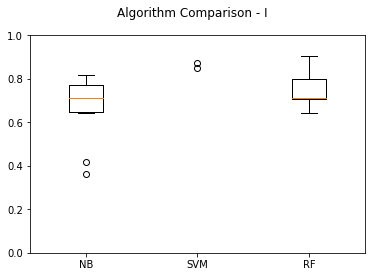

In [50]:
run_models(X1, title= 'Algorithm Comparison - I')

In [51]:
X2.shape

(1600, 304)

NB: 0.654375 (0.136503)
SVM: 0.485000 (0.105112)
RF: 0.743125 (0.077179)


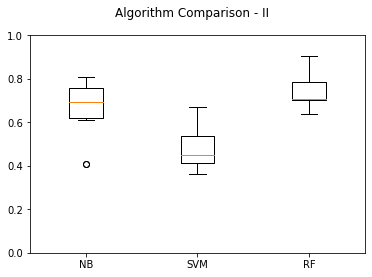

In [52]:
run_models(X2, title= 'Algorithm Comparison - II')